# Assignment 4: Decision Trees Classifier

## Prajwal Dinesh Sahu
## ME18B114

The Car Evaluation Database was derived from a simple hierarchical decision model. The
prediction task is to classify a car based on its safety.

The variables

`buying ` - Buying price

`maintenance` - Price of the maintenance

`doors` - Number of doors

`persons` - Capacity in terms of persons to
carry

`lug_boot`- The size of luggage boot

`safety ` - Estimated safety of the car

`Target` - Target variable to predict

### Importing Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('car_evaluation.csv')

In [3]:
df.columns = ['Buying','Maintenance','Doors','Persons','Lug_boot','Safety','Target']
df

,Buying,Maintenance,Doors,Persons,Lug_boot,Safety,Target
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
df.columns

Index(['Buying', 'Maintenance', 'Doors', 'Persons', 'Lug_boot', 'Safety',
       'Target'],
      dtype='object')

### Target

In [5]:
df.Target.value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

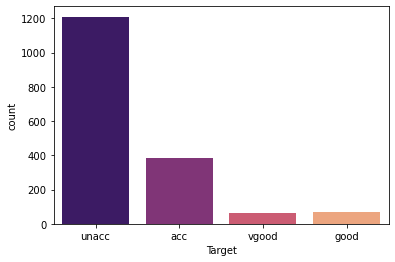

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=df, palette = 'magma')

In [7]:
def f(x):
    if x == 'unacc':
        return 0
    if x == 'acc':
        return 1
    if x == 'good':
        return 2
    else:
        return 3

In [8]:
df['Target_num'] = df.Target.apply(lambda x: f(x))


In [9]:
df

,Buying,Maintenance,Doors,Persons,Lug_boot,Safety,Target,Target_num
0,vhigh,vhigh,2,2,small,med,unacc,0
1,vhigh,vhigh,2,2,small,high,unacc,0
2,vhigh,vhigh,2,2,med,low,unacc,0
3,vhigh,vhigh,2,2,med,med,unacc,0
4,vhigh,vhigh,2,2,med,high,unacc,0
...,...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good,2
1723,low,low,5more,more,med,high,vgood,3
1724,low,low,5more,more,big,low,unacc,0
1725,low,low,5more,more,big,med,good,2


## Numeric Variables

In [10]:
num = [var for var in df.columns if df[var].dtype!='O']
num

['Target_num']

### Doors

In [11]:
df.Doors.value_counts()

4        432
3        432
5more    432
2        431
Name: Doors, dtype: int64

In [12]:
df.Doors.replace('5more',5,inplace =True)

In [13]:
df.Doors.value_counts()

5    432
4    432
3    432
2    431
Name: Doors, dtype: int64

In [14]:
df.Doors = df.Doors.astype(int)

<AxesSubplot:xlabel='Doors', ylabel='count'>

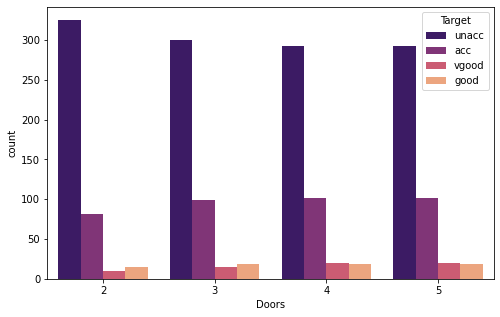

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x='Doors', hue="Target", data=df, palette = 'magma')

### Persons

In [16]:
df.Persons.value_counts()

4       576
more    576
2       575
Name: Persons, dtype: int64

In [17]:
df.Persons.replace('more',6,inplace =True)

In [18]:
df.Persons

0       2
1       2
2       2
3       2
4       2
       ..
1722    6
1723    6
1724    6
1725    6
1726    6
Name: Persons, Length: 1727, dtype: object

In [19]:
df.Persons = df.Persons.astype(int)

<AxesSubplot:xlabel='Persons', ylabel='count'>

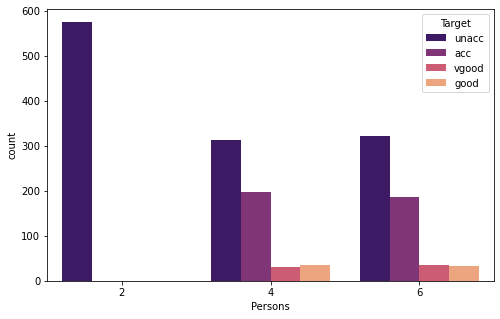

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x='Persons', hue="Target", data=df, palette = 'magma')

## Categorical Variables

In [21]:
cat = [var for var in df.columns if df[var].dtype=='O']
cat

['Buying', 'Maintenance', 'Lug_boot', 'Safety', 'Target']

### Buying

In [22]:
df.Buying.value_counts()

low      432
med      432
high     432
vhigh    431
Name: Buying, dtype: int64

<AxesSubplot:xlabel='Buying', ylabel='count'>

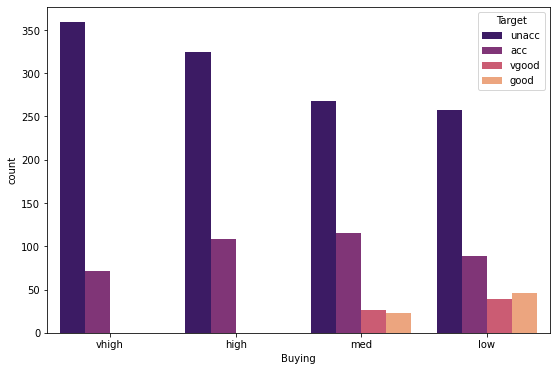

In [23]:
plt.figure(figsize=(9,6))
sns.countplot(x='Buying', hue="Target", data=df, palette = 'magma')

In [24]:
df['Buying'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)

df['Buying'].value_counts()

0    432
1    432
2    432
3    431
Name: Buying, dtype: int64

### Maintenance

In [25]:
df['Maintenance'].value_counts()

low      432
med      432
high     432
vhigh    431
Name: Maintenance, dtype: int64

<AxesSubplot:xlabel='Maintenance', ylabel='count'>

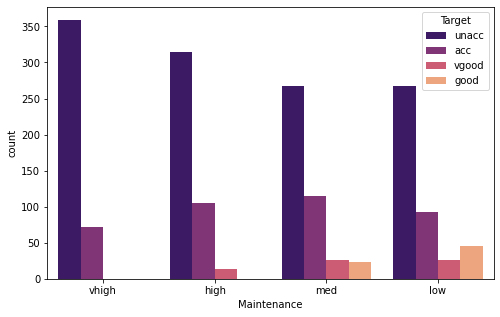

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x='Maintenance', hue="Target", data=df, palette = 'magma')

In [27]:
df['Maintenance'].replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)

df['Maintenance'].value_counts()

0    432
1    432
2    432
3    431
Name: Maintenance, dtype: int64

### Lug_boot

In [28]:
df.Lug_boot.value_counts()

med      576
big      576
small    575
Name: Lug_boot, dtype: int64

<AxesSubplot:xlabel='Lug_boot', ylabel='count'>

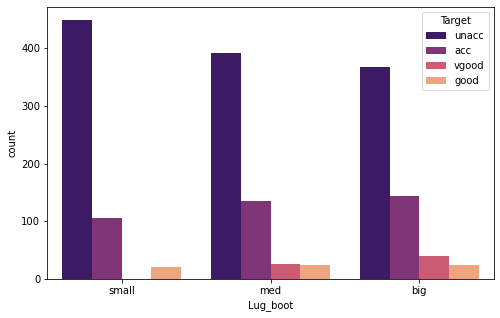

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x='Lug_boot', hue="Target", data=df, palette = 'magma')

In [30]:
df['Lug_boot'].replace(('small','med','big'), (0, 1, 2), inplace = True)

df['Lug_boot'].value_counts()

1    576
2    576
0    575
Name: Lug_boot, dtype: int64

### Safety

In [31]:
df.Safety.value_counts()

med     576
high    576
low     575
Name: Safety, dtype: int64

<AxesSubplot:xlabel='Safety', ylabel='count'>

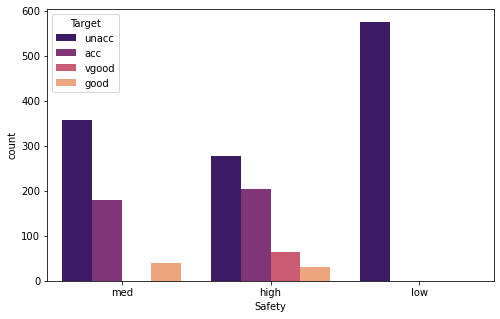

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x='Safety', hue="Target", data=df, palette = 'magma')

In [33]:
df['Safety'].replace(('low','med','high'), (0, 1, 2), inplace = True)

df['Safety'].value_counts()

1    576
2    576
0    575
Name: Safety, dtype: int64

## Correlation Check

In [34]:
df.corr()

,Buying,Maintenance,Doors,Persons,Lug_boot,Safety,Target_num
Buying,1.000000,-0.001043,0.001043,0.000952,0.000952,0.000952,-0.282488
Maintenance,-0.001043,1.000000,0.001043,0.000952,0.000952,0.000952,-0.232128
Doors,0.001043,0.001043,1.000000,-0.000952,-0.000952,-0.000952,0.065662
Persons,0.000952,0.000952,-0.000952,1.000000,-0.000869,-0.000869,0.341489
Lug_boot,0.000952,0.000952,-0.000952,-0.000869,1.000000,-0.000869,0.157617
Safety,0.000952,0.000952,-0.000952,-0.000869,-0.000869,1.000000,0.439171
Target_num,-0.282488,-0.232128,0.065662,0.341489,0.157617,0.439171,1.000000


<AxesSubplot:>

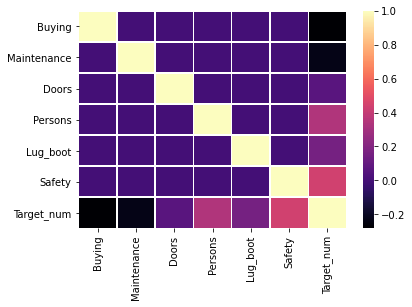

In [35]:
sns.heatmap(df.corr(),linewidths=.5,cmap="magma")

## Train-Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Target','Target_num'],axis=1), df.Target, test_size=0.2, random_state=42)

## Model

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
DecisionTreeClassifier

sklearn.tree._classes.DecisionTreeClassifier

In [40]:
dtc = DecisionTreeClassifier(max_depth=11)

In [41]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11)

In [42]:
dtc.score(X_test,y_test)

0.9653179190751445

In [43]:
dtc.score(X_train,y_train)

0.999275887038378

## Hyper Parameter Tuning

In [44]:
scores = []
max_depth = []
for i in range(1,31):
    max_depth.append(i)
    tree_test= DecisionTreeClassifier(max_depth=i,criterion='entropy')
    tree_test.fit(X_train,y_train)
    scores.append(tree_test.score(X_test,y_test))
    print('Accuracy for depth',i, "is",tree_test.score(X_test,y_test))

Accuracy for depth 1 is 0.684971098265896
Accuracy for depth 2 is 0.7803468208092486
Accuracy for depth 3 is 0.8121387283236994
Accuracy for depth 4 is 0.8497109826589595
Accuracy for depth 5 is 0.8757225433526011
Accuracy for depth 6 is 0.8988439306358381
Accuracy for depth 7 is 0.9190751445086706
Accuracy for depth 8 is 0.9450867052023122
Accuracy for depth 9 is 0.9624277456647399
Accuracy for depth 10 is 0.9595375722543352
Accuracy for depth 11 is 0.9653179190751445
Accuracy for depth 12 is 0.9653179190751445
Accuracy for depth 13 is 0.9653179190751445
Accuracy for depth 14 is 0.9653179190751445
Accuracy for depth 15 is 0.9653179190751445
Accuracy for depth 16 is 0.9653179190751445
Accuracy for depth 17 is 0.9653179190751445
Accuracy for depth 18 is 0.9653179190751445
Accuracy for depth 19 is 0.9653179190751445
Accuracy for depth 20 is 0.9653179190751445
Accuracy for depth 21 is 0.9653179190751445
Accuracy for depth 22 is 0.9653179190751445
Accuracy for depth 23 is 0.965317919075144

<AxesSubplot:xlabel='Max Depth', ylabel='Score'>

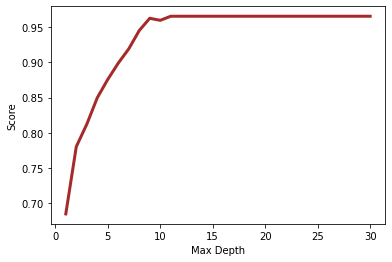

In [45]:
plt.xlabel('Max Depth')
plt.ylabel('Score')
sns.lineplot(x=max_depth, y= scores, color='brown', linewidth=3, markers = 'bo')


In [46]:
max_score = max(scores)
max_score

0.9653179190751445

In [47]:
max_index = scores.index(max_score)
max_index+1

11

### Grid Search

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
params = {
    'max_depth': [2, 3, 5, 10,11,12,13,14.15, 20],
    'min_samples_leaf': [1,2,3, 5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [50]:
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [51]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=11), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 11, 12, 13, 14.15, 20],
                         'min_samples_leaf': [1, 2, 3, 5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [52]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008559,0.001349,0.004966,0.000815,gini,2,1,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.786127,0.782609,0.768116,0.771014,0.776967,0.007575,129
1,0.006339,0.001398,0.004311,0.001921,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.786127,0.782609,0.768116,0.771014,0.776967,0.007575,129
2,0.007896,0.001000,0.006869,0.002852,gini,2,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.786127,0.782609,0.768116,0.771014,0.776967,0.007575,129
3,0.015203,0.002371,0.008264,0.003042,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.786127,0.782609,0.768116,0.771014,0.776967,0.007575,129
4,0.012499,0.002419,0.005523,0.001868,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.786127,0.782609,0.768116,0.771014,0.776967,0.007575,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.010820,0.002413,0.003963,0.000409,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.933526,0.965217,0.939130,0.933333,0.942802,0.013149,47
140,0.008668,0.001946,0.005370,0.000787,entropy,20,10,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.936416,0.944928,0.930435,0.930435,0.935553,0.005938,55
141,0.009032,0.001202,0.003914,0.001523,entropy,20,20,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.895954,0.933333,0.878261,0.904348,0.902974,0.019897,67
142,0.010137,0.001466,0.006652,0.001065,entropy,20,50,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.875723,0.875362,0.846377,0.843478,0.860235,0.015342,92


In [53]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=13)

## Best Model

In [54]:
dtc_best =DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [55]:
dtc_best.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [56]:
dtc_best.score(X_test,y_test)

0.9653179190751445

In [57]:
dtc_best.score(X_train,y_train)

1.0

### Tree Visualization

[Text(167.4, 489.24, 'Safety <= 0.5\ngini = 0.452\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(83.7, 380.52000000000004, 'gini = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(251.10000000000002, 380.52000000000004, 'Persons <= 3.0\ngini = 0.576\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(334.8, 271.8, 'Buying <= 1.5\ngini = 0.625\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(167.4, 163.08000000000004, 'Maintenance <= 1.5\ngini = 0.652\nsamples = 298\nvalue = [155, 54, 41, 48]'),
 Text(83.7, 54.360000000000014, 'gini = 0.69\nsamples = 150\nvalue = [49, 54, 7, 40]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.431\nsamples = 148\nvalue = [106, 0, 34, 8]'),
 Text(502.20000000000005, 163.08000000000004, 'Maintenance <= 1.5\ngini = 0.499\nsamples = 317\nvalue = [152, 0, 165, 0]'),
 Text(418.5, 54.360000000000014, 'gini = 0.381\nsamples = 164\nvalue = [122, 0, 42, 0]'),
 Text(585

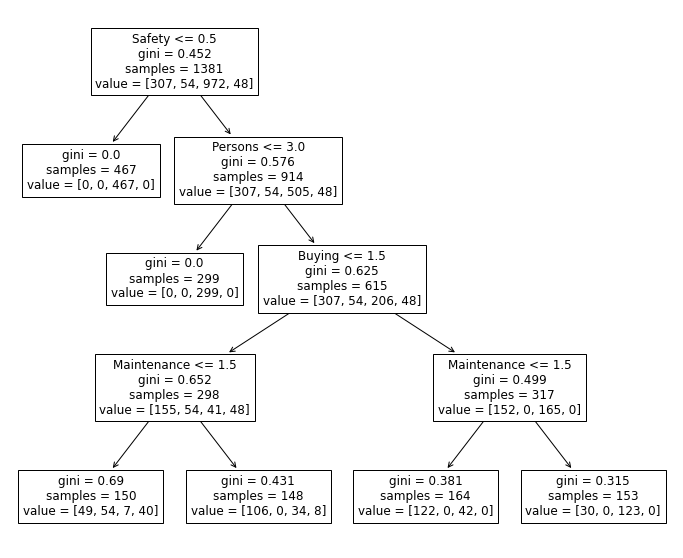

In [58]:
plt.figure(figsize=(12,10))

from sklearn import tree
dtc_sample = DecisionTreeClassifier(max_depth=4)
tree.plot_tree(dtc_sample.fit(X_train, y_train),feature_names=X_train.columns) 

## XGBoost

In [59]:
from xgboost import XGBClassifier

In [60]:
xgb = XGBClassifier()

In [61]:
xgb.fit(X_train, y_train)

D:\Anaconda_Installed\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:19:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
xgb.score(X_train, y_train)

1.0

In [63]:
xgb.score(X_test, y_test)

0.9826589595375722

## Metrics

In [70]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [71]:
pred_test = dtc_best.predict(X_test)
pred_train = dtc_best.predict(X_train)

In [72]:
y_test.value_counts()

unacc    237
acc       77
vgood     17
good      15
Name: Target, dtype: int64

In [73]:
cm = confusion_matrix(y_test, pred_test)
cm

array([[ 71,   2,   2,   2],
       [  2,  12,   0,   1],
       [  1,   0, 236,   0],
       [  0,   2,   0,  15]], dtype=int64)

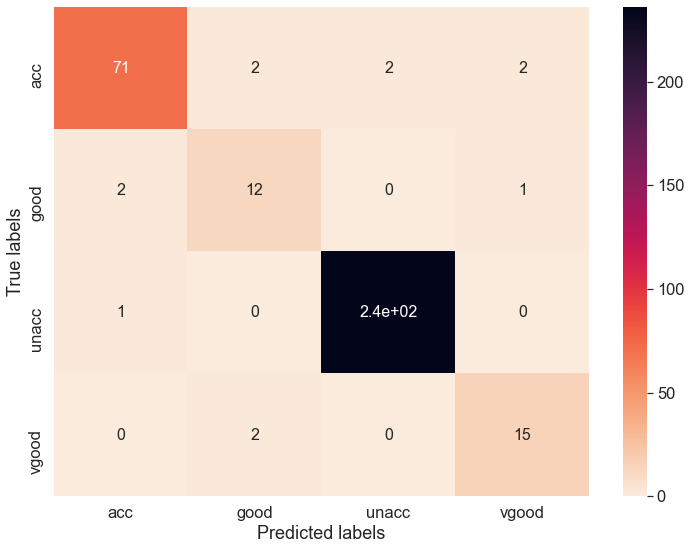

In [74]:
df_cm = pd.DataFrame(cm)
plt.figure(figsize=(12,9))
sns.set(font_scale=1.5)
ax = sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap="rocket_r") # font size
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.xaxis.set_ticklabels(['acc','good','unacc','vgood']); ax.yaxis.set_ticklabels(['acc','good','unacc','vgood']);
plt.show()


In [75]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         acc       0.96      0.92      0.94        77
        good       0.75      0.80      0.77        15
       unacc       0.99      1.00      0.99       237
       vgood       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.88      0.90      0.89       346
weighted avg       0.97      0.97      0.97       346



##   --- THE END ---